In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import keras.backend as K
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [2]:
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
 
from keras.models import Model

In [3]:
import pandas as pd
from load_images import create_dataset_from_images, create_target_encoding

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [5]:
np.random.seed(0)

In [6]:
IMAGES_FOLDER = './data_old/'

In [7]:
X, y_cat = create_dataset_from_images(IMAGES_FOLDER)

In [8]:
X_full = np.array(X)

In [9]:
y_cat[0]

'coffee_mug'

In [10]:
y = create_target_encoding(y_cat)

{'coffee_mug': 0, 'phone': 1, 'small_box': 2}


In [11]:
np.unique(y)

array([0, 1, 2])

In [12]:
np.unique(y_cat)

array(['coffee_mug', 'phone', 'small_box'], dtype='<U10')

In [13]:
y_full = np.array(y)

In [14]:
num_samples = []
rows = 3
cols = 5

(-0.5, 223.5, 223.5, -0.5)

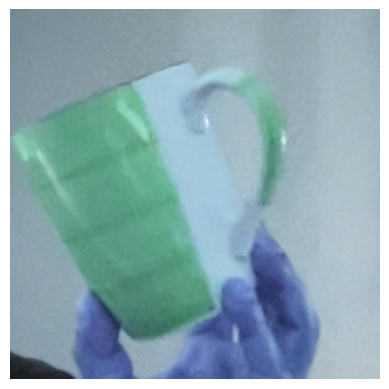

In [15]:
plt.imshow(X_full[0,:,:])
plt.axis('off')

In [16]:
len(X_full[y_full == 2])

121

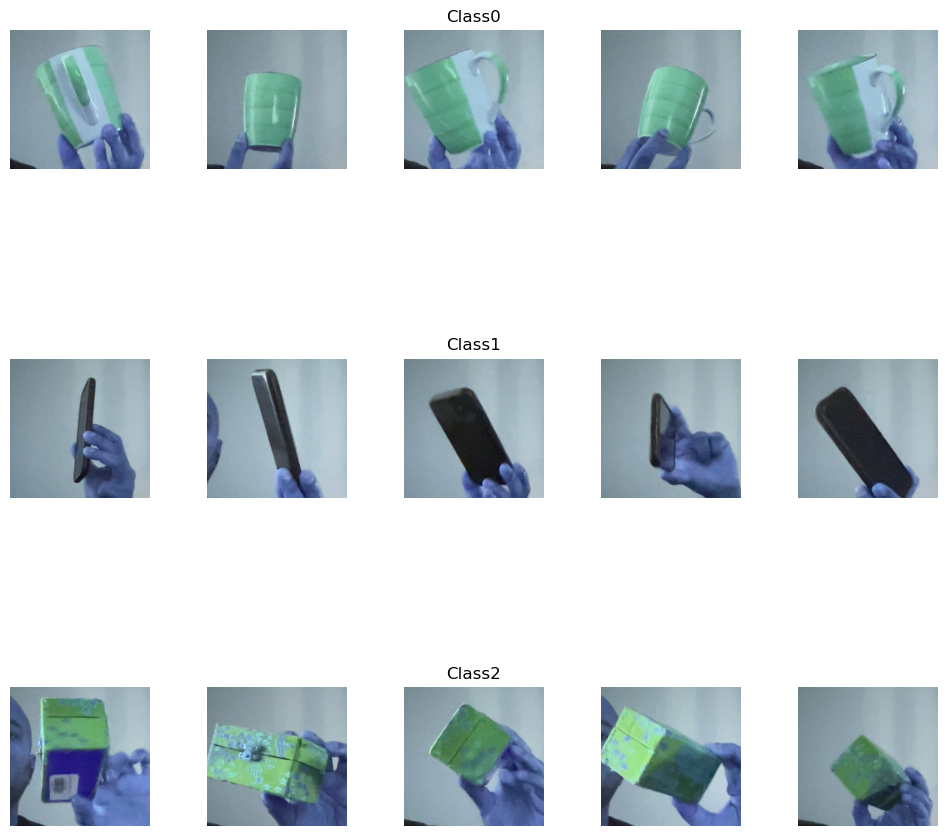

In [17]:
fig, axs = plt.subplots(nrows=rows, ncols = cols, figsize=(10, 10))
fig.tight_layout()
for i in range(cols):
    for j in range(rows):
        X_temp = X_full[y_full == j]
        axs[j][i].imshow(X_temp[random.randint(0, len(X_temp)-1), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title('Class' + str(j))
            num_samples.append(len(X_temp))

Text(0, 0.5, 'Number of images')

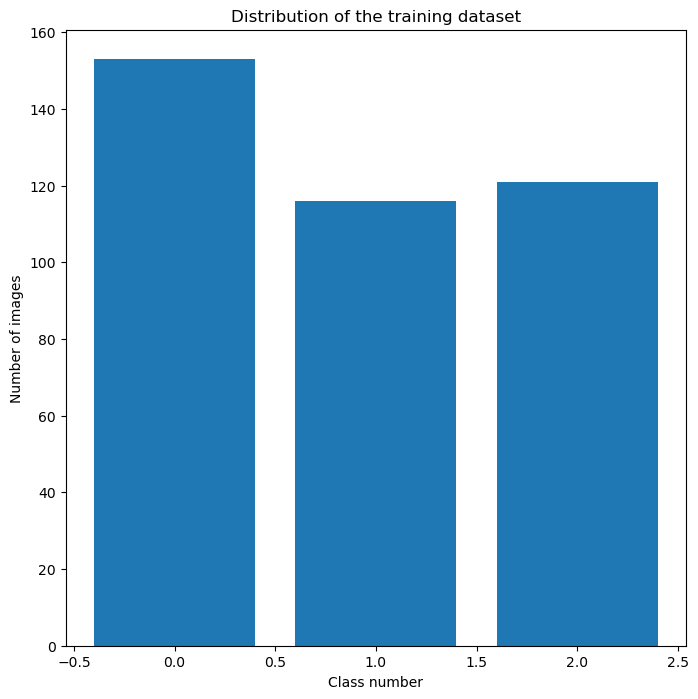

In [18]:
plt.figure(figsize=(8, 8))
plt.bar(range(0, rows), num_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.1, random_state=0)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((351, 224, 224, 3), (39, 224, 224, 3), (351,), (39,))

In [21]:
y_original = y_test.copy()

In [22]:
y_train = to_categorical(y_train, num_classes=rows, dtype='float32')
y_test = to_categorical(y_test, num_classes=rows, dtype='float32')

In [46]:
def cnn_model():
  # create model
  model = Sequential()
  model.add(Conv2D(filters=32, kernel_size=2, strides=(2, 2), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(20, activation='relu'))
  model.add(Dense(rows, activation='softmax'))
  # Compile model
  model.compile(Adam(learning_rate = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [55]:
K.clear_session()

In [56]:
model = cnn_model()

In [57]:
history=model.fit(X_train, y_train, epochs=15, validation_split = 0.1, batch_size = 30, verbose = 1, shuffle = 1)

Epoch 1/15
 1/11 [=>............................] - ETA: 3s - loss: 1.1111 - accuracy: 0.3333

2022-11-18 14:21:39.929797: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 1s 36ms/step - loss: 3.2153 - accuracy: 0.3365 - val_loss: 1.0909 - val_accuracy: 0.3889
Epoch 2/15
 4/11 [=========>....................] - ETA: 0s - loss: 1.0756 - accuracy: 0.5583

2022-11-18 14:21:40.399280: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 0s 25ms/step - loss: 1.0053 - accuracy: 0.6159 - val_loss: 0.7513 - val_accuracy: 0.6667
Epoch 3/15
11/11 [==============================] - 0s 26ms/step - loss: 0.5638 - accuracy: 0.8159 - val_loss: 0.5512 - val_accuracy: 0.8333
Epoch 4/15
11/11 [==============================] - 0s 26ms/step - loss: 0.3232 - accuracy: 0.8794 - val_loss: 0.3852 - val_accuracy: 0.8889
Epoch 5/15
11/11 [==============================] - 0s 24ms/step - loss: 0.2215 - accuracy: 0.9238 - val_loss: 0.2127 - val_accuracy: 0.8889
Epoch 6/15
11/11 [==============================] - 0s 23ms/step - loss: 0.2985 - accuracy: 0.8698 - val_loss: 0.4957 - val_accuracy: 0.7778
Epoch 7/15
11/11 [==============================] - 0s 23ms/step - loss: 0.1788 - accuracy: 0.9238 - val_loss: 0.2966 - val_accuracy: 0.8889
Epoch 8/15
11/11 [==============================] - 0s 23ms/step - loss: 0.1355 - accuracy: 0.9556 - val_loss: 0.2886 - val_accuracy: 0.9167
Epoch 9/15
11/11 [======

<AxesSubplot: >

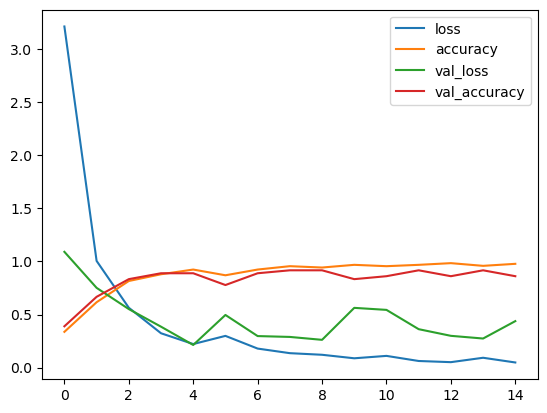

In [58]:
pd.DataFrame(history.history).plot()

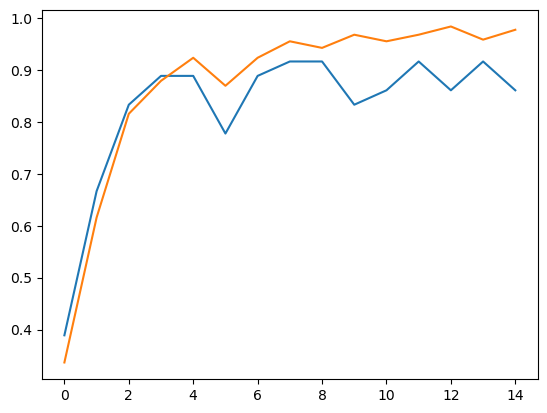

In [59]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])


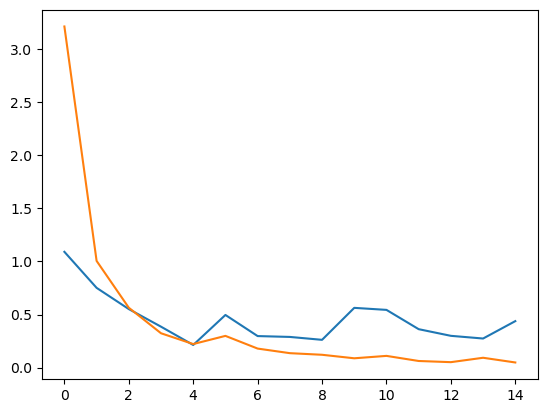

In [60]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

In [61]:
score = model.evaluate(X_test, y_test, verbose=1)

2/2 [==============================] - 0s 24ms/step - loss: 0.0633 - accuracy: 0.9744


In [65]:
#model.save('./pretrained_models/first_new_model.h5')

In [63]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 20ms/step


2022-11-18 14:22:04.801959: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


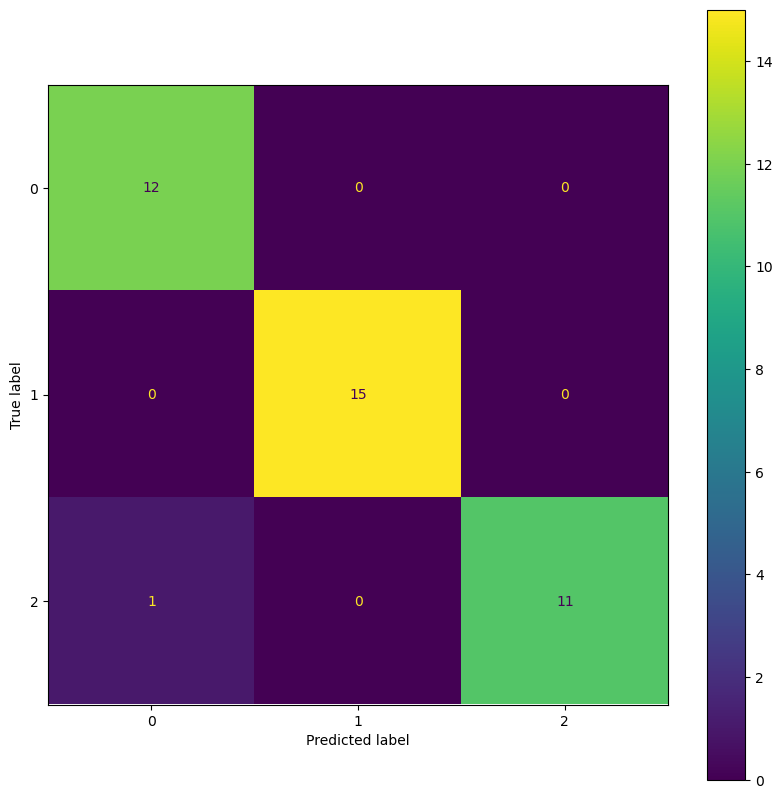

In [64]:
cm = confusion_matrix(y_true=y_original, y_pred=np.argmax(y_pred, axis=1))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=np.unique(y_original))
fig, ax = plt.subplots(figsize=(10,10))

disp.plot(ax=ax)